In [1]:
import nltk
from nltk.tokenize import word_tokenize


In [2]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
# HELP on the tags from nltk
# Some corpora have README files with tagset documentation, see nltk.corpus.???.readme(), substituting in the name of the corpus.
# nltk.help.upenn_tagset('PRP')
# nltk.help.upenn_tagset('NN.*') # for all NN* tags

In [4]:
# HOMONYMS: wo words are homonyms if they are pronounced or spelled the same way but have different meanings
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [5]:
# text=word_tokenize("We go to car race every year but haven't won the race till now")
text=word_tokenize("I race to win. Life is all about dream race")
# text=word_tokenize("It is an arduous race, for only the fittest, yet the race is always booked early to its maximum.")
nltk.pos_tag(text)
text=nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [6]:
# text.similar('woman') #noun
# text.similar('bought') # verb
# text.similar('over') #preposition
text.similar('the') # determiners

a his this their its her an that our any all one these my in your no
some other and


In [7]:
import nltk
# nltk.download('all')

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### POS Tagging - Lexicon and Rule Based Taggers

 - http://localhost:8890/notebooks/DataScience/IIIT-B%20NLP/Treebank%2BEDA.ipynb

In [40]:
import nltk
import pprint, time
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('treebank')
from collections import Counter

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\jaisa05\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [12]:
wsj=list(nltk.corpus.treebank.tagged_sents())
wsjw=list(nltk.corpus.treebank.tagged_words())

In [21]:
print("-----sentence-------")
print(wsj[:1])
print("-----words-------")
print(wsjw[:2])

-----sentence-------
[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]]
-----words-------
[('Pierre', 'NNP'), ('Vinken', 'NNP')]


In [75]:
# tagged_words=[tup for sent in wsj for tup in sent]
# print(len(tagged_words))
# or
tagged_words=list(nltk.corpus.treebank.tagged_words())
print(len(tagged_words))
tagged_words[0:10]
# print(len(wsjw))
# [tup for sent in wsj for tup in sent]

100676


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

In [38]:
print(tagged_words[:3])
# coverting list of tuples to Dataframe for better extraction of words without tags
word_df=pd.DataFrame(tagged_words)
word_df.head()
tags=word_df[1]
words=word_df[0]
unique_tags=set(tags)
print(type(tags))
print(type(unique_tags))
print(len(tags))
print(len(unique_tags))

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ',')]
<class 'pandas.core.series.Series'>
<class 'set'>
100676
46


In [58]:
tag_counts=Counter(tags)
print(type(tag_counts))
tag_counts_df=pd.DataFrame(tag_counts,index=['count']).T
tag_counts_df.index.name='Tag'
tag_counts_df.reset_index(inplace=True)

<class 'collections.Counter'>


In [69]:
tag_counts_df.sort_values(by='count',ascending=False,inplace=True)

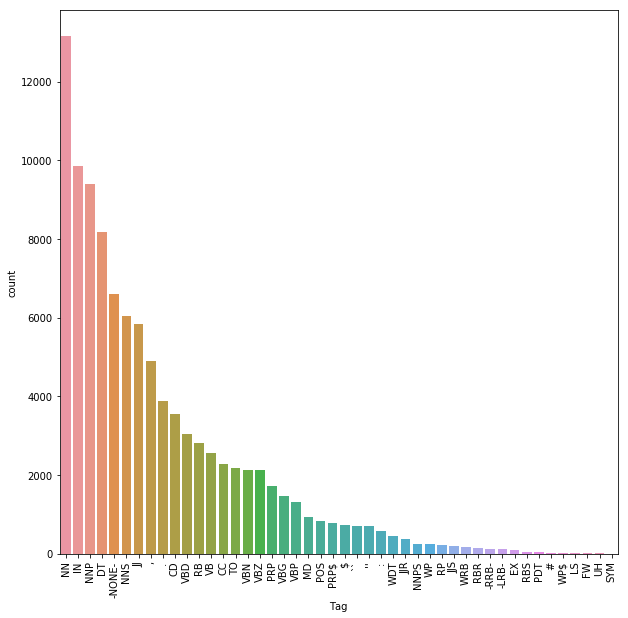

In [70]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='Tag',y='count',data=tag_counts_df)

In [73]:
print(tag_counts.most_common(1))
print(tag_counts.most_common(5))

[('NN', 13166)]
[('NN', 13166), ('IN', 9857), ('NNP', 9410), ('DT', 8165), ('-NONE-', 6592)]


In [87]:
years_df=pd.DataFrame([pair for pair in tagged_words if pair[0].lower()=='money'])
years_df.groupby(1).count()

,0
1,
NN,56
NNP,4


In [30]:
# lst=[[1,2],[3,4],[5,6],[7,8],[9,10]]
# [n for ls in lst for n in ls]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]